# Make Data Source

In [5]:
MAKE_EXCEL = True

if MAKE_EXCEL:
    #import packages
    import pandas as pd
    import numpy as np
    import nltk 
    nltk.download('punkt') 

    #import data
    df = pd.read_excel(SOURCE)
    print (df)


    #lower case
    df_text=df[['Question']]
    df_text['Question']=df_text['Question'].str.lower()
    df_text

    #tokenization
    from nltk import word_tokenize
    nltk.download('punkt')
    df_text['Question'] = df_text['Question'].apply(lambda X: word_tokenize(X))
    df_text.head()

    #remove punctuations/special characters
    from nltk.tokenize import RegexpTokenizer
    nltk.download('punkt')

    def remove_punct(text):

        tokenizer = RegexpTokenizer(r"\w+")
        lst = tokenizer.tokenize(' '.join(text))
        return lst

    df_text['Question'] = df_text['Question'].apply(remove_punct)
    df_text

#lemmatization

    from nltk.stem.snowball import GermanStemmer
    stemmer = GermanStemmer()
    from nltk import word_tokenize,pos_tag
    nltk.download('averaged_perceptron_tagger') 

    def lemmatization(text):

        result=[]
        wordnet = GermanStemmer()
        for token,tag in pos_tag(text):
            pos=tag[0].lower()

            if pos not in ['a', 'r', 'n', 'v']:
                pos='n'

            result.append(wordnet.stem(token)) 

        return result

    df_text['Question']=df_text['Question'].apply(lemmatization) 
    df_text
    
    #remove stopwords
    from nltk.corpus import stopwords
    nltk.download('stopwords')

    de_stopwords = stopwords.words('german')
        # we append "werd" to the stopwords list which is missing for better NLP results
    de_stopwords.append("werd")
    
    print(de_stopwords)

    def remove_stopwords(text):
        result = []
        for token in text:
            if token not in de_stopwords:
                result.append(token)

        return result

    df_text['Question'] = df_text['Question'].apply(remove_stopwords)
    df_text

    df_new = pd.DataFrame(df_text)
    print(df_new)

    #download preprocessed df as csv file
    df_new.to_csv(SOURCE)
    



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-5-d68323bc07f5>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Question']=df_text['Question'].str.lower()
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-5-d68323bc07f5>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

     Year                                           Question  \
0    2021  Auf allen Autobahnen soll ein generelles Tempo...   
1    2021  Deutschland soll seine Verteidigungsausgaben e...   
2    2021  Bei Bundestagswahlen sollen auch Jugendliche a...   
3    2021  Die Förderung von Windenergie soll beendet wer...   
4    2021  Die Möglichkeiten der Vermieterinnen und Vermi...   
..    ...                                                ...   
204  2002                     Berufsarmee statt Wehrpflicht.   
205  2002  Den ärmsten Ländern der Welt müssen die Schuld...   
206  2002          Der Verteidigungsetat muss erhöht werden.   
207  2002  Frauen müssen auch ohne vorherige Beratung str...   
208  2002  Homo-Ehen erhalten die gleichen Rechte wie Het...   

                                  Titel  
0             Tempolimit auf Autobahnen  
1    Erhöhung der Verteidigungsausgaben  
2                          Wählen ab 16  
3                           Windenergie  
4         Begrenzung 

<ipython-input-5-d68323bc07f5>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Question']=df_text['Question'].apply(lemmatization)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-5-d68323bc07f5>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['Question'] = df_text['Question'].apply(remove_stopwords)


## Vectorize

In [6]:
import pandas as pd 

df = pd.read_excel (SOURCE, dtype=str)    # before this, the preprocessed csv file must be converted to an excel file
print (df)

# Vectorization 
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=1, min_df=0)

# apply transformation
tf = vectorizer.fit_transform(df['Question']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

    Unnamed: 0                                           Question
0            0  ['all', 'autobahn', 'generell', 'tempolimit', ...
1            1    ['deutschland', 'verteidigungsausgab', 'erhoh']
2            2  ['bundestagswahl', 'jugend', 'ab', 'jahr', 'wa...
3            3                ['forder', 'windenergi', 'beendet']
4            4  ['moglich', 'vermieterinn', 'vermiet', 'wohnun...
..         ...                                                ...
204        204             ['berufsarme', 'statt', 'wehrpflicht']
205        205      ['armst', 'land', 'welt', 'schuld', 'erlass']
206        206                    ['verteidigungsetat', 'erhoht']
207        207  ['frau', 'ohn', 'vorher', 'berat', 'straffrei'...
208        208  ['homo', 'ehen', 'erhalt', 'gleich', 'recht', ...

[209 rows x 2 columns]


# LDA

In [7]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 10

model_LDA = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

model_LDA.fit(tf)

def display_topics(model_LDA, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model_LDA.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 5
display_topics(model_LDA, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,gas,1.1,internetseit,1.1,durchsuch,1.1,finanzier,1.1,kommunikationsdat,1.1,ehen,2.1,arbeitnehm,1.1,abgerechnet,1.1,verandert,1.1,beim,1.1
1,transportiert,1.1,fak,1.1,sicherheitsbehord,1.1,energieintensiv,1.1,speicher,1.1,bundesbehord,1.1,arbeitnehmerinn,1.1,behandl,1.1,besetzt,1.1,kohlenstoffdioxid,1.1
2,pipelin,1.1,news,1.1,comput,1.1,bish,1.1,telefon,1.1,unterschied,1.1,angehor,1.1,fallpauschal,1.1,lebensmittel,1.1,heiz,1.1
3,russland,1.1,losch,1.1,verdeckt,1.1,industri,1.1,internet,1.1,sprachlich,1.1,zeit,1.1,krankenhaus,1.1,gentechn,1.1,festgelegt,1.1
4,nord,1.1,falschinformation,1.1,onlin,1.1,energiew,1.1,anlass,1.1,veroffentlich,1.1,lohnersatzleist,1.1,stationar,1.1,abwechselnd,1.1,ausstoss,1.1


## Visualisation of LDA results

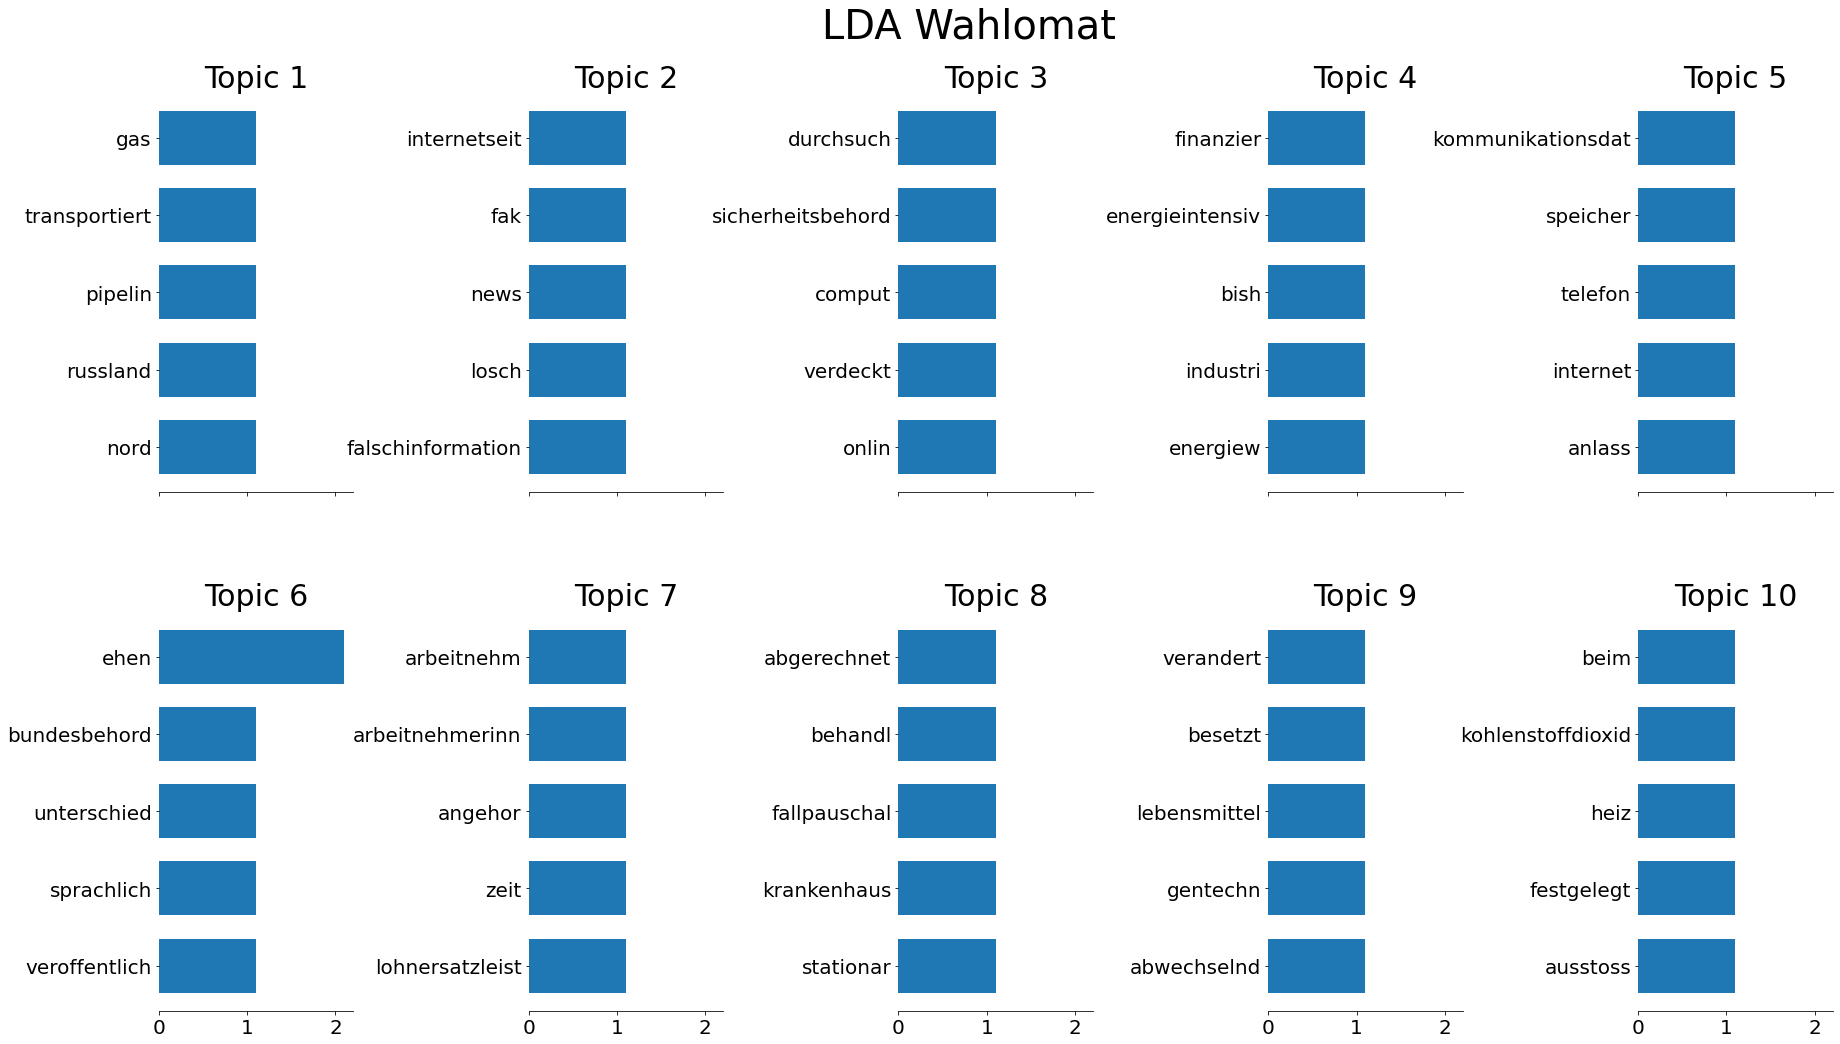

In [8]:
import matplotlib.pyplot as plt

def plot_top_words(model_LDA, tf_feature_names, no_top_words, title='LDA Wahlomat'):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model_LDA.components_):
        top_features_ind = topic.argsort()[: -no_top_words - 1 : -1]
        top_features = [tf_feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
plot_top_words(model_LDA, tf_feature_names, no_top_words, title='LDA Wahlomat')

# NMF

In [27]:
from sklearn.decomposition import NMF  

number_of_topics = 10

model_NMF = NMF(n_components=number_of_topics, random_state=0, alpha=0, l1_ratio=1) 
model_NMF.fit(tf)

def display_topics(model_NMF, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model_NMF.components_):   
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

no_top_words = 10
display_topics(model_NMF, tf_feature_names, no_top_words)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights,Topic 5 words,Topic 5 weights,Topic 6 words,Topic 6 weights,Topic 7 words,Topic 7 weights,Topic 8 words,Topic 8 weights,Topic 9 words,Topic 9 weights
0,ausstoss,1.2,losch,0.7,ehen,1.4,pipelin,0.7,speicher,0.7,angehor,0.7,geschlechtsidentitat,0.7,beschaftigt,0.4,fallpauschal,0.5,bish,0.7
1,autofahr,1.2,internetseit,0.7,adopti,0.7,ostse,0.7,telefon,0.7,arbeitnehm,0.7,bundesbehord,0.7,selb,0.4,stationar,0.5,finanzier,0.7
2,beim,1.2,fak,0.7,gleich,0.7,transportiert,0.7,anlass,0.7,arbeitnehmerinn,0.7,berucksicht,0.7,erlaub,0.4,abgerechnet,0.5,industri,0.7
3,steig,1.2,falschinformation,0.7,hetero,0.7,russland,0.7,konkret,0.7,zeit,0.7,sprachlich,0.7,homeoffic,0.4,krankenhaus,0.5,energiew,0.7
4,festgelegt,1.2,betreib,0.7,abschlagsfrei,0.0,stream,0.7,kommunikationsdat,0.7,pfleg,0.7,unterschied,0.7,arbeit,0.4,behandl,0.5,energieintensiv,0.7
5,preis,1.2,wurd,0.7,beitragsjahr,0.0,gas,0.7,internet,0.7,lohnersatzleist,0.7,veroffentlich,0.7,mutt,0.3,bestimmt,0.4,gymnasi,0.3
6,heiz,1.2,hingewies,0.7,bereit,0.0,nord,0.7,verwendet,0.0,abschlagsfrei,0.0,vorrang,0.0,traditionell,0.3,selbstgenutzt,0.4,schulsyst,0.3
7,kohlenstoffdioxid,1.2,news,0.7,renteneintritt,0.0,gegenub,0.0,haushaltsuberschuss,0.0,beitragsjahr,0.0,gegenub,0.0,vat,0.3,erwerb,0.4,haupt,0.3
8,vorrang,0.0,verwendet,0.0,zuwand,0.0,vorrang,0.0,uberwieg,0.0,bereit,0.0,mehrausgab,0.0,lebensgemeinschaft,0.3,wohneigentum,0.4,gegliedert,0.3
9,mehrausgab,0.0,abbau,0.0,verpflicht,0.0,tilg,0.0,abbau,0.0,renteneintritt,0.0,tilg,0.0,and,0.3,steuerfrei,0.4,realschul,0.3


## Visualization of NMF results

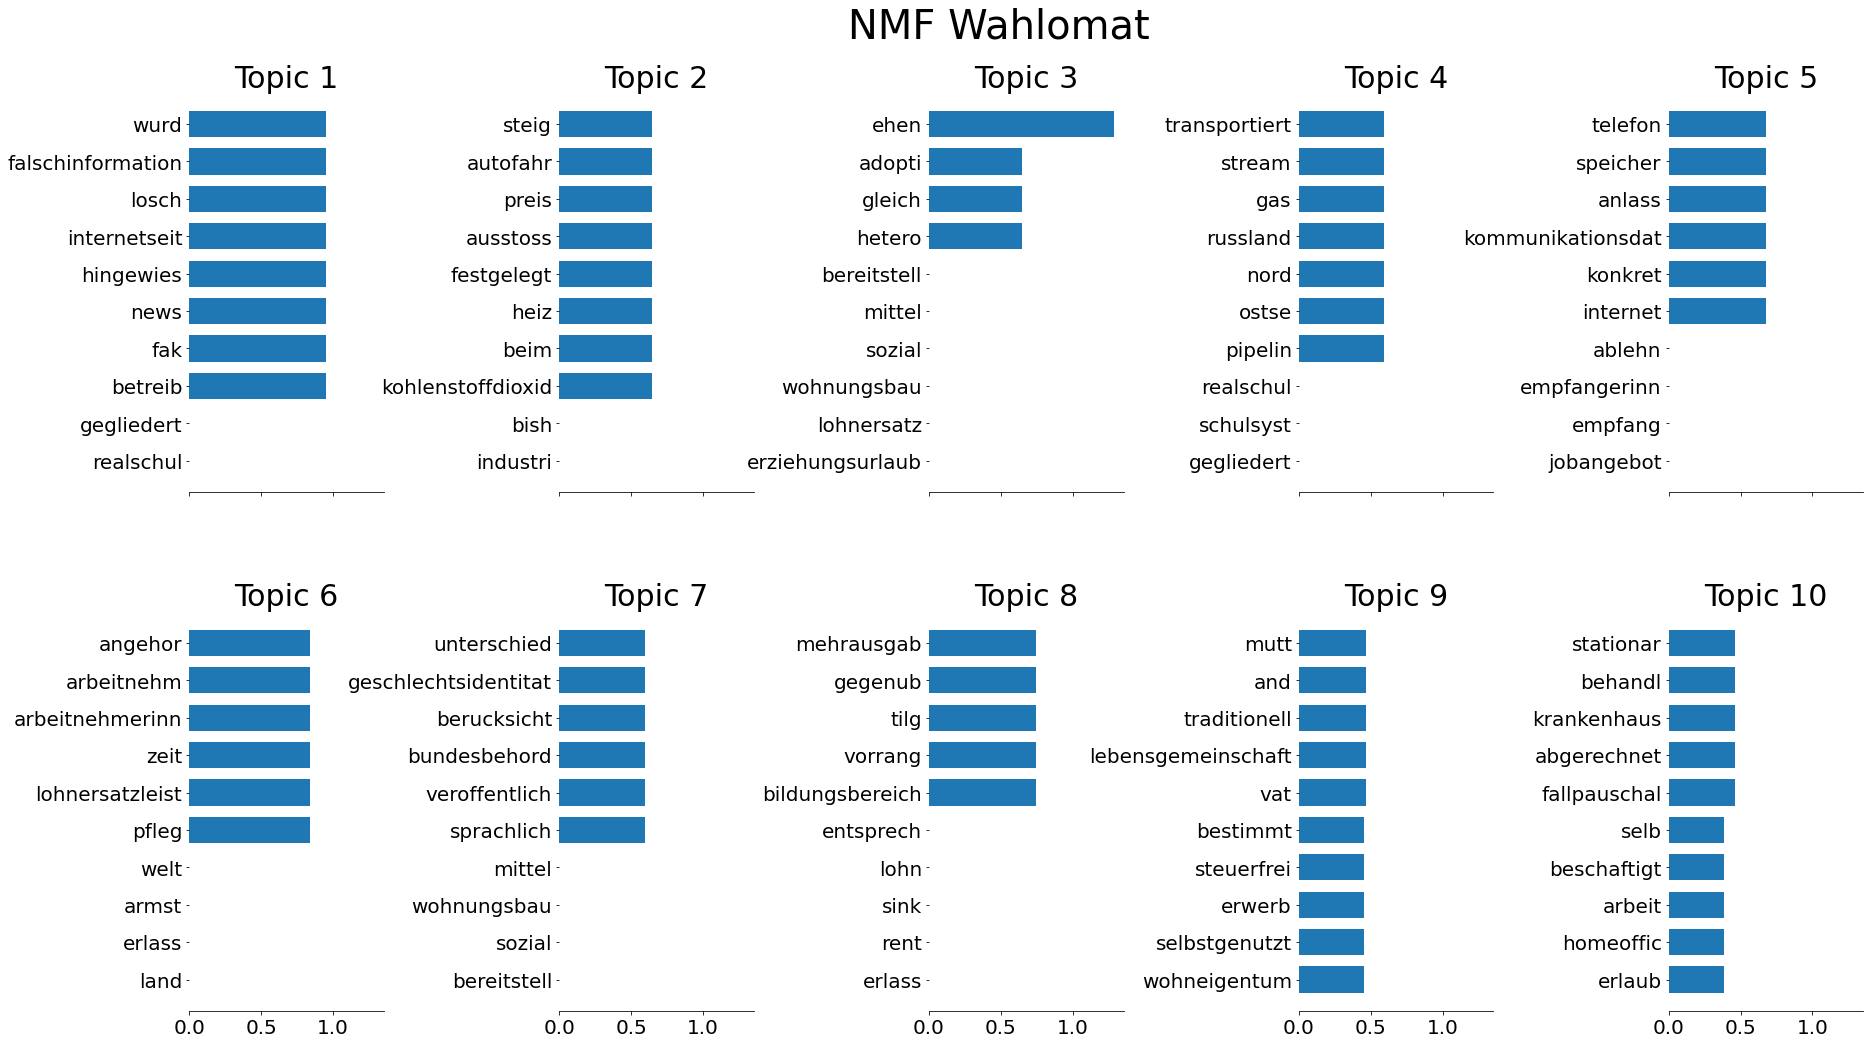

In [10]:
import matplotlib.pyplot as plt

def plot_top_words(model_NMF, tf_feature_names, no_top_words, title='NMF Wahlomat'):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model_NMF.components_):
        top_features_ind = topic.argsort()[: -no_top_words - 1 : -1]
        top_features = [tf_feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
plot_top_words(model_NMF, tf_feature_names, no_top_words, title='NMF Wahlomat')

# GDSMM

In [11]:
import pandas as pd
import numpy as np
from gsdmm import MovieGroupProcess
import gensim

# cast tweets to numpy array
docs = df['Question'].str.split(' ').to_numpy()

# create dictionary of all words in all documents
dictionary = gensim.corpora.Dictionary(docs)

# filter extreme cases out of dictionary
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=10000)

# create variable containing length of dictionary/vocab
vocab_length = len(dictionary)

# create BOW dictionary
bow_corpus = [dictionary.doc2bow(doc) for doc in docs]

# initialize GSDMM
gsdmm = MovieGroupProcess(K=10, alpha=0, beta=0.3, n_iters=10)

# fit GSDMM model
y = gsdmm.fit(docs, vocab_length)

In stage 0: transferred 161 clusters with 10 clusters populated
In stage 1: transferred 114 clusters with 10 clusters populated
In stage 2: transferred 97 clusters with 10 clusters populated
In stage 3: transferred 95 clusters with 10 clusters populated
In stage 4: transferred 93 clusters with 10 clusters populated
In stage 5: transferred 85 clusters with 10 clusters populated
In stage 6: transferred 88 clusters with 10 clusters populated
In stage 7: transferred 98 clusters with 10 clusters populated
In stage 8: transferred 84 clusters with 10 clusters populated
In stage 9: transferred 95 clusters with 10 clusters populated


In [12]:
doc_count = np.array(gsdmm.cluster_doc_count)
list(zip(range(len(doc_count)), doc_count))

[(0, 20),
 (1, 21),
 (2, 18),
 (3, 18),
 (4, 19),
 (5, 23),
 (6, 21),
 (7, 23),
 (8, 27),
 (9, 19)]

In [13]:
# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
print('Number of documents per topic :', list(zip(range(len(doc_count)), doc_count)))

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-10:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(gsdmm.cluster_word_distribution, top_index, 10)

Number of documents per topic : [(0, 20), (1, 21), (2, 18), (3, 18), (4, 19), (5, 23), (6, 21), (7, 23), (8, 27), (9, 19)]
Most important clusters (by number of docs inside): [8 7 5 6 1 0 9 4 3 2]

Cluster 8 : [("['deutschland',", 11), ("'eingefuhrt']", 5), ("'europa',", 4), ("'union',", 4), ("'fur',", 4), ("'austret']", 3), ("'gelockert']", 3), ("'bedingungslos',", 2), ("'grundeinkomm',", 2), ("'wahrung',", 2)]

Cluster 7 : [("'jahr',", 5), ("['gesetz',", 4), ("['fur',", 4), ("'gesenkt']", 3), ("'eingefuhrt']", 3), ("'sollt',", 3), ("'flachendeck',", 3), ("'erhoht']", 3), ("'mindestlohn',", 2), ("['abgeordnet',", 2)]

Cluster 5 : [("'weiterhin',", 6), ("'abgeschafft']", 5), ("['all',", 3), ("'religionsgemeinschaft',", 3), ("'bleib']", 3), ("['unternehm',", 3), ("'fur',", 2), ("'bank',", 2), ("'verstaatlicht']", 2), ("'vollstand',", 2)]

Cluster 6 : [("'eingesetzt',", 4), ("'offent',", 4), ("'durf']", 3), ("['videouberwach',", 3), ("'hoh',", 3), ("'verbot']", 3), ("['terrorismusbekampf

## BERT

In [14]:
doc = df['Question']
doc

0      ['all', 'autobahn', 'generell', 'tempolimit', ...
1        ['deutschland', 'verteidigungsausgab', 'erhoh']
2      ['bundestagswahl', 'jugend', 'ab', 'jahr', 'wa...
3                    ['forder', 'windenergi', 'beendet']
4      ['moglich', 'vermieterinn', 'vermiet', 'wohnun...
                             ...                        
204               ['berufsarme', 'statt', 'wehrpflicht']
205        ['armst', 'land', 'welt', 'schuld', 'erlass']
206                      ['verteidigungsetat', 'erhoht']
207    ['frau', 'ohn', 'vorher', 'berat', 'straffrei'...
208    ['homo', 'ehen', 'erhalt', 'gleich', 'recht', ...
Name: Question, Length: 209, dtype: object

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_range = (2,2)

count = CountVectorizer(ngram_range=ngram_range)
X = count.fit_transform(doc)
candidates = count.get_feature_names()
candidates

['16 jahr',
 'ab jahr',
 'abbau staatsschuld',
 'abgebaut durf',
 'abgeordnet bundestag',
 'abgeordnet verpflichtet',
 'abschlagsfrei moglich',
 'abtreib durf',
 'abwechselnd frau',
 'acht jahr',
 'adoptionsrecht erhalt',
 'adoptionsrecht fur',
 'afghanistan abgezog',
 'agrarsubvention deutlich',
 'aktiv wahlrecht',
 'all autobahn',
 'all bank',
 'all bundesland',
 'all burg',
 'all burgerinn',
 'all dauerhaft',
 'all deutsch',
 'all erwerbstat',
 'all kind',
 'all nebeneinkunft',
 'all straftat',
 'allein fur',
 'and lebensgemeinschaft',
 'anerkannt fluchtling',
 'anerkannt konn',
 'angab grund',
 'angehob durf',
 'angehor pfleg',
 'angeleg bundesland',
 'anspruch bafog',
 'anspruch nehm',
 'ansteck krankheit',
 'antisemitismus stark',
 'arbeit homeoffic',
 'arbeitnehm fur',
 'arbeitnehmerinn arbeitnehm',
 'arbeitslosengeld ii',
 'arbeitsvermittl sollt',
 'arbeitsvertrag weiterhin',
 'armst land',
 'asyl erhalt',
 'asyl weiterhin',
 'asylsuch jahrlich',
 'atomenergi festgehalt',
 'ato

In [16]:
# before this install sentence-transformers
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('distiluse-base-multilingual-cased-v1') # Pretrainened German model 
doc_embedding = model.encode([doc])
candidate_embeddings = model.encode(candidates)
candidate_embeddings

array([[ 0.01304488,  0.02130779, -0.03088608, ..., -0.05067123,
        -0.01180071,  0.01051449],
       [ 0.0017441 , -0.01058046, -0.0089957 , ..., -0.05963491,
         0.0459354 , -0.03064355],
       [ 0.03089935, -0.04219492,  0.02294363, ..., -0.03779113,
         0.05942431, -0.03729936],
       ...,
       [-0.01086026, -0.03508238,  0.00035662, ..., -0.02349827,
         0.0175355 ,  0.01407066],
       [ 0.02062604, -0.06402184, -0.00701085, ..., -0.00996454,
        -0.02266434, -0.0425446 ],
       [ 0.00653877, -0.04475578,  0.01760093, ..., -0.02355044,
        -0.00263332, -0.05420139]], dtype=float32)

In [17]:
from sklearn.metrics.pairwise import cosine_similarity

top_n = 10
distances = cosine_similarity(doc_embedding, candidate_embeddings)
keywords = [candidates[index] for index in distances.argsort()[0][-top_n:]]
keywords

['deutschland verteidigungsausgab',
 'verteidigungsausgab deutschland',
 'deutsch grenz',
 'generell tempolimit',
 'tempolimit gelt',
 'autobahn generell',
 'all autobahn',
 'tempolimit deutsch',
 'deutsch autobahn',
 'tempolimit autobahn']

In [18]:
import numpy as np
import itertools

# Max Sum Similarity

def max_sum_sim(doc_embedding, word_embeddings, words, top_n, nr_candidates):
    # Calculate distances and extract keywords
    distances = cosine_similarity(doc_embedding, candidate_embeddings)
    distances_candidates = cosine_similarity(candidate_embeddings, candidate_embeddings)

    # Get top_n words as candidates based on cosine similarity
    words_idx = list(distances.argsort()[0][-nr_candidates:])
    words_vals = [candidates[index] for index in words_idx]
    distances_candidates = distances_candidates[np.ix_(words_idx, words_idx)]

    # Calculate the combination of words that are the least similar to each other
    min_sim = np.inf
    candidate = None
    for combination in itertools.combinations(range(len(words_idx)), top_n):
        sim = sum([distances_candidates[i][j] for i in combination for j in combination if i != j])
        if sim < min_sim:
            candidate = combination
            min_sim = sim

    return [words_vals[idx] for idx in candidate]

max_sum_sim(doc_embedding, candidate_embeddings, candidates, top_n=10, nr_candidates=10)

['deutschland verteidigungsausgab',
 'verteidigungsausgab deutschland',
 'deutsch grenz',
 'generell tempolimit',
 'tempolimit gelt',
 'autobahn generell',
 'all autobahn',
 'tempolimit deutsch',
 'deutsch autobahn',
 'tempolimit autobahn']

In [19]:
import numpy as np

# Maximal Marginal Relevance
def mmr(doc_embedding, word_embeddings, words, top_n, diversity):

    # Extract similarity within words, and between words and the document
    word_doc_similarity = cosine_similarity(word_embeddings, doc_embedding)
    word_similarity = cosine_similarity(word_embeddings)

    # Initialize candidates and already choose best keyword/keyphras
    keywords_idx = [np.argmax(word_doc_similarity)]
    candidates_idx = [i for i in range(len(words)) if i != keywords_idx[0]]

    for _ in range(top_n - 1):
        # Extract similarities within candidates and
        # between candidates and selected keywords/phrases
        candidate_similarities = word_doc_similarity[candidates_idx, :]
        target_similarities = np.max(word_similarity[candidates_idx][:, keywords_idx], axis=1)

        # Calculate MMR
        mmr = (1-diversity) * candidate_similarities - diversity * target_similarities.reshape(-1, 1)
        mmr_idx = candidates_idx[np.argmax(mmr)]

        # Update keywords & candidates
        keywords_idx.append(mmr_idx)
        candidates_idx.remove(mmr_idx)

    return [words[idx] for idx in keywords_idx]

mmr(doc_embedding, candidate_embeddings, candidates, top_n=10, diversity=0.5)

['tempolimit autobahn',
 'deutschland verteidigungsausgab',
 'all kind',
 'ausbau kommunikationsinfrastruktur',
 'weiterhin verbot',
 'fingerabdruck personalausweis',
 'euro wahrung',
 'acht jahr',
 'geschlechtsidentitat sprachlich',
 'polizei innerhalb']